# penguins_tvae stacking

Training on penguins dataset using tvae model and stacking data

In [1]:
# Imports

from synthesizers import Load
from syntheval import SynthEval
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd

c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[KeOps] Warning : 
    The default C++ compiler could not be found on your system.
    You need to either define the CXX environment variable or a symlink to the g++ command.
    For example if g++-8 is the command you can do
      import os
      os.environ['CXX'] = 'g++-8'
    
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


Declare real dataset and split into train/test

In [2]:
# Read penguins data
penguins_real = pd.read_csv("Data\penguins_size.csv")
penguins_real = penguins_real.dropna()
gen_method = "tvae"
target = "species"

In [3]:
# Split penguins data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_real, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv("Data\penguins_train.csv", index=False)
penguins_test.to_csv("Data\penguins_test.csv", index=False)

In [3]:
penguins_train = pd.read_csv("Data\penguins_train.csv")
penguins_test = pd.read_csv("Data\penguins_test.csv")

# syn_v1

In [4]:
# Synthesize data
gen_count = penguins_real.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v1.csv", key="synth")

[2024-05-06T20:12:06.158274+0200][9256][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 50%|█████     | 500/1000 [01:14<01:14,  6.70it/s]


[{'train':        species     island  culmen_length_mm  culmen_depth_mm  \
0       Gentoo     Biscoe              40.9             13.7   
1       Adelie      Dream              37.3             17.8   
2       Gentoo     Biscoe              50.0             15.9   
3       Adelie     Biscoe              35.9             19.2   
4       Adelie     Biscoe              40.5             18.9   
..         ...        ...               ...              ...   
262  Chinstrap      Dream              50.9             19.1   
263     Adelie  Torgersen              37.2             19.4   
264     Adelie     Biscoe              39.7             17.7   
265     Gentoo     Biscoe              45.5             15.0   
266     Adelie     Biscoe              38.1             17.0   

     flipper_length_mm  body_mass_g     sex  
0                214.0       4650.0  FEMALE  
1                191.0       3350.0  FEMALE  
2                224.0       5350.0    MALE  
3                189.0       3800.0 

# syn_v2

In [6]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v1.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate real and synthesized data
penguins_stack = pd.concat([penguins_real, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v1.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v1_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v1_test.csv", index=False)

In [7]:
# Synthesize data
gen_count = penguins_stack.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v2.csv", key="synth")

[2024-05-06T20:15:16.019709+0200][9256][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 50%|█████     | 500/1000 [02:06<02:06,  3.94it/s]


[{'train':        species     island  culmen_length_mm  culmen_depth_mm  \
235     Gentoo     Biscoe              45.1             14.5   
399  Chinstrap      Dream              49.8             18.9   
602     Adelie      Dream              41.5             17.5   
61      Adelie     Biscoe              41.1             19.1   
145     Adelie      Dream              41.5             18.5   
..         ...        ...               ...              ...   
71      Adelie  Torgersen              37.2             19.4   
106     Adelie     Biscoe              39.7             17.7   
270     Gentoo     Biscoe              45.5             15.0   
435     Gentoo     Biscoe              36.0             14.8   
102     Adelie     Biscoe              38.1             17.0   

     flipper_length_mm  body_mass_g     sex  
235              215.0       5000.0  FEMALE  
399              196.2       3932.8    MALE  
602              189.7       3862.2    MALE  
61               188.0       4100.0 

# syn_v3

In [8]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v2.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate stack and synthesized data
penguins_stack = pd.concat([penguins_stack, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v2.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v2_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v2_test.csv", index=False)

In [9]:
# Synthesize data
gen_count = penguins_stack.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v3.csv", key="synth")

[2024-05-06T20:19:22.915489+0200][9256][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 45%|████▌     | 450/1000 [03:16<03:59,  2.29it/s]


[{'train':         species     island  culmen_length_mm  culmen_depth_mm  \
1112     Adelie      Dream              56.7             18.1   
966      Gentoo  Torgersen              49.7             18.4   
598      Adelie     Biscoe              38.2             19.0   
170   Chinstrap      Dream              46.7             17.9   
275      Gentoo     Biscoe              45.7             13.9   
...         ...        ...               ...              ...   
1095     Adelie      Dream              48.4             17.9   
1130     Adelie     Biscoe              41.4             18.3   
1294     Gentoo     Biscoe              49.2             14.8   
860      Gentoo     Biscoe              49.2             18.1   
1126     Adelie      Dream              42.4             18.2   

      flipper_length_mm  body_mass_g     sex  
1112              193.3       3651.7    MALE  
966               223.5       5270.5  FEMALE  
598               193.2       3603.7    MALE  
170               19

# syn_v4

In [10]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v3.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate stack and synthesized data
penguins_stack = pd.concat([penguins_stack, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v3.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v3_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v3_test.csv", index=False)

In [11]:
# Synthesize data
gen_count = penguins_stack.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v4.csv", key="synth")

[2024-05-06T20:22:39.988100+0200][9256][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 75%|███████▌  | 750/1000 [11:21<03:47,  1.10it/s]


[{'train':         species     island  culmen_length_mm  culmen_depth_mm  \
1011     Gentoo  Torgersen              39.5             18.7   
1273  Chinstrap      Dream              46.5             17.8   
69       Adelie  Torgersen              42.8             18.5   
2539  Chinstrap      Dream              48.5             18.3   
942      Gentoo     Biscoe              46.1             17.7   
...         ...        ...               ...              ...   
1638  Chinstrap     Biscoe              40.5             15.3   
1095     Adelie      Dream              48.4             17.9   
1130     Adelie     Biscoe              41.4             18.3   
1294     Gentoo     Biscoe              49.2             14.8   
860      Gentoo     Biscoe              49.2             18.1   

      flipper_length_mm  body_mass_g     sex  
1011              193.6       4969.7  FEMALE  
1273              189.3       3492.0  FEMALE  
69                195.0       4250.0    MALE  
2539              19

# syn_v5

In [12]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v4.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate stack and synthesized data
penguins_stack = pd.concat([penguins_stack, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v4.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v4_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v4_test.csv", index=False)

In [13]:
# Synthesize data
gen_count = penguins_stack.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v5.csv", key="synth")

[2024-05-06T20:34:02.624666+0200][9256][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 75%|███████▌  | 750/1000 [22:23<07:27,  1.79s/it]


[{'train':         species     island  culmen_length_mm  culmen_depth_mm  \
5054     Adelie     Biscoe              48.6             17.9   
120      Adelie  Torgersen              38.8             17.6   
2351     Adelie      Dream              41.2             18.6   
1907     Gentoo     Biscoe              39.1             18.3   
3648     Gentoo     Biscoe              48.6             18.5   
...         ...        ...               ...              ...   
3092     Adelie     Biscoe              49.3             18.4   
3772     Adelie      Dream              37.0             18.3   
5191     Gentoo      Dream              49.0             15.0   
5226  Chinstrap      Dream              49.8             18.1   
860      Gentoo     Biscoe              49.2             18.1   

      flipper_length_mm  body_mass_g     sex  
5054              193.7       3539.3  FEMALE  
120               191.0       3275.0  FEMALE  
2351              219.4       5286.0    MALE  
1907              21

# stack_v5 - Final stack

In [14]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v5.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate stack and synthesized data
penguins_stack = pd.concat([penguins_stack, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v5.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v5_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v5_test.csv", index=False)

# Train on stack_v5 and save as state

In [15]:
# Train stack_v5 and save as state
state_stack_v5 = Load(penguins_train).Train(plugin=gen_method)

[2024-05-06T20:56:28.055485+0200][9256][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 80%|████████  | 800/1000 [1:14:14<18:33,  5.57s/it]   


# stack_v5 (synth only)

In [16]:
# Remove the first 334 rows, equal to the real data, from stack_v5
penguins_stack_synth_only = penguins_stack.iloc[334:, :]

# Save to csv
penguins_stack_synth_only.to_csv(f"{gen_method}\penguins_stack_synth_only.csv", index=False)

# Split synth_only stack into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack_synth_only, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_synth_only_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_synth_only_test.csv", index=False)

# Train on synth_only and save as state

In [17]:
# Train synth_only stack and save as state
state_stack_synth_only = Load(penguins_train).Train(plugin=gen_method)

[2024-05-06T22:10:44.510385+0200][9256][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 90%|█████████ | 900/1000 [1:08:46<07:38,  4.58s/it]  


# Generate synth data based on stack_v5

In [18]:
# Synthesize data
gen_count = penguins_real.shape[0]

state_stack_v5.Generate(count=gen_count).Save(name=f"{gen_method}\stack_v5_syn.csv", key="synth")

[{'train':       species     island  culmen_length_mm  culmen_depth_mm  \
9876   Adelie     Biscoe              40.4             18.4   
10068  Gentoo     Biscoe              39.4             18.1   
10316  Adelie      Dream              49.3             18.5   
8622   Adelie  Torgersen              39.2             18.6   
8994   Adelie     Biscoe              40.3             15.1   
...       ...        ...               ...              ...   
5734   Adelie      Dream              39.4             18.1   
5191   Gentoo      Dream              49.0             15.0   
5390   Adelie      Dream              49.1             18.0   
860    Gentoo     Biscoe              49.2             18.1   
7270   Adelie      Dream              40.8             18.4   

       flipper_length_mm  body_mass_g     sex  
9876               194.4       3673.6    MALE  
10068              218.8       3762.3  FEMALE  
10316              222.2       3750.2  FEMALE  
8622               193.8       3811.7   

In [19]:
# Read synthesized data
stack_v5_syn = pd.read_csv(f"{gen_method}\stack_v5_syn.csv").round(1)

# Remove first column
stack_v5_syn = stack_v5_syn.iloc[:, 1:]

# Generate synth data based on synth_only

In [20]:
# Synthesize data
gen_count = penguins_real.shape[0]

state_stack_synth_only.Generate(count=gen_count).Save(name=f"{gen_method}\stack_synth_only_syn.csv", key="synth")

[{'train':       species     island  culmen_length_mm  culmen_depth_mm  \
1381   Adelie     Biscoe              47.1             18.0   
7695   Gentoo     Biscoe              40.1             18.3   
10167  Adelie      Dream              36.2             18.2   
5550   Gentoo      Dream              49.6             18.8   
1100   Adelie  Torgersen              40.7             18.7   
...       ...        ...               ...              ...   
6068   Adelie      Dream              40.4             18.1   
5525   Adelie      Dream              40.3             18.7   
5724   Adelie     Biscoe              46.6             18.0   
1194   Adelie      Dream              39.1             18.6   
7604   Gentoo     Biscoe              38.9             18.0   

       flipper_length_mm  body_mass_g     sex  
1381               192.3       4819.5    MALE  
7695               194.9       3734.6  FEMALE  
10167              191.9       3621.2    MALE  
5550               224.2       3871.8   

In [21]:
# Read synthesized data
stack_synth_only_syn = pd.read_csv(f"{gen_method}\stack_synth_only_syn.csv").round(1)

# Remove first column
stack_synth_only_syn = stack_synth_only_syn.iloc[:, 1:]

# Eval on syn_1

In [22]:
# Read train and test data (this is base/real train and test data, not the stack data)
penguins_train = pd.read_csv("Data\penguins_train.csv")
penguins_test = pd.read_csv("Data\penguins_test.csv")

# Read syn_v1 data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v1.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_real = S.evaluate(penguins_syn,target,"full_eval")
res_real

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.040234,0.008365,0.959766,0.008365
1,pca_eigval_diff,u,0.253222,NaN,0.746778,NaN
2,pca_eigvec_ang,u,0.116909,NaN,0.962787,NaN
3,avg_cio,u,0.000000,0.000000,0.000000,0.000000
4,corr_mat_diff,u,2.154705,NaN,0.897395,NaN
5,mutual_inf_diff,u,0.894862,NaN,0.957388,NaN
6,ks_tvd_stat,u,0.160380,0.026729,0.839620,0.026729
7,frac_ks_sigs,u,0.857143,NaN,0.142857,NaN
8,avg_h_dist,u,0.121616,0.089746,0.878384,0.089746
9,avg_pMSE,u,0.009926,0.001286,0.960297,0.005143


# Eval on syn_2

In [23]:
# Read train and test data from stack_v1
penguins_train = pd.read_csv(f"{gen_method}\penguins_stack_v1_train.csv")
penguins_test = pd.read_csv(f"{gen_method}\penguins_stack_v1_test.csv")

# Read syn_v2 data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v2.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v1 = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v1

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.020963,0.005596,0.979037,0.005596
1,pca_eigval_diff,u,0.223385,NaN,0.776615,NaN
2,pca_eigvec_ang,u,0.063869,NaN,0.979670,NaN
3,avg_cio,u,0.417348,0.242529,0.417348,0.242529
4,corr_mat_diff,u,1.397661,NaN,0.933445,NaN
5,mutual_inf_diff,u,0.589765,NaN,0.971916,NaN
6,ks_tvd_stat,u,0.105111,0.030696,0.894889,0.030696
7,frac_ks_sigs,u,0.714286,NaN,0.285714,NaN
8,avg_h_dist,u,0.108643,0.095094,0.891357,0.095094
9,avg_pMSE,u,0.009075,0.000794,0.963700,0.003176


# Eval on syn_3

In [24]:
# Read train and test data from stack_v2
penguins_train = pd.read_csv(f"{gen_method}\penguins_stack_v2_train.csv")
penguins_test = pd.read_csv(f"{gen_method}\penguins_stack_v2_test.csv")

# Read syn_v3 data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v3.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v2 = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v2

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.018365,0.003825,0.981635,0.003825
1,pca_eigval_diff,u,0.181545,NaN,0.818455,NaN
2,pca_eigvec_ang,u,0.120500,NaN,0.961644,NaN
3,avg_cio,u,0.105270,0.105270,0.105270,0.105270
4,corr_mat_diff,u,0.970419,NaN,0.953790,NaN
5,mutual_inf_diff,u,0.450662,NaN,0.978540,NaN
6,ks_tvd_stat,u,0.095281,0.014448,0.904719,0.014448
7,frac_ks_sigs,u,1.000000,NaN,0.000000,NaN
8,avg_h_dist,u,0.107914,0.091495,0.892086,0.091495
9,avg_pMSE,u,0.005196,0.000239,0.979216,0.000957


# Eval on syn_4

In [25]:
# Read train and test data from stack_v3
penguins_train = pd.read_csv(f"{gen_method}\penguins_stack_v3_train.csv")
penguins_test = pd.read_csv(f"{gen_method}\penguins_stack_v3_test.csv")

# Read syn_v4 data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v4.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v3 = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v3

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.007105,0.002683,0.992895,0.002683
1,pca_eigval_diff,u,0.052230,NaN,0.947770,NaN
2,pca_eigvec_ang,u,0.078468,NaN,0.975023,NaN
3,avg_cio,u,0.307855,0.215699,0.307855,0.215699
4,corr_mat_diff,u,0.247848,NaN,0.988198,NaN
5,mutual_inf_diff,u,0.205102,NaN,0.990233,NaN
6,ks_tvd_stat,u,0.049364,0.009592,0.950636,0.009592
7,frac_ks_sigs,u,0.714286,NaN,0.285714,NaN
8,avg_h_dist,u,0.099507,0.091830,0.900493,0.091830
9,avg_pMSE,u,0.001215,0.000085,0.995141,0.000340


# Eval on syn_5

In [26]:
# Read train and test data from stack_v4
penguins_train = pd.read_csv(f"{gen_method}\penguins_stack_v4_train.csv")
penguins_test = pd.read_csv(f"{gen_method}\penguins_stack_v4_test.csv")

# Read syn_v5 data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v5.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v4 = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v4

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.012604,0.001839,0.987396,0.001839
1,pca_eigval_diff,u,0.096550,NaN,0.903450,NaN
2,pca_eigvec_ang,u,0.152034,NaN,0.951606,NaN
3,avg_cio,u,0.209751,0.209751,0.209751,0.209751
4,corr_mat_diff,u,0.390252,NaN,0.981417,NaN
5,mutual_inf_diff,u,0.191820,NaN,0.990866,NaN
6,ks_tvd_stat,u,0.053770,0.016526,0.946230,0.016526
7,frac_ks_sigs,u,0.571429,NaN,0.428571,NaN
8,avg_h_dist,u,0.098447,0.092745,0.901553,0.092745
9,avg_pMSE,u,0.002675,0.000173,0.989302,0.000692


# Eval on stack_v5 to real data

This evaluation will be different. We will evaluate the synth data generated based off our training of stack_v5, but we will insert the real_data train and test set, in order to see how close or far the stacked synthetic data compares to the original data.

In [27]:
# Read train and test data from real data
penguins_train = pd.read_csv("Data\penguins_train.csv")
penguins_test = pd.read_csv("Data\penguins_test.csv")

# Read stack_v5_syn data
penguins_syn = pd.read_csv(f"{gen_method}\stack_v5_syn.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v5_on_real = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v5_on_real

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.039588,0.008251,0.960412,0.008251
1,pca_eigval_diff,u,0.390747,NaN,0.609253,NaN
2,pca_eigvec_ang,u,0.225772,NaN,0.928135,NaN
3,avg_cio,u,0.143585,0.143585,0.143585,0.143585
4,corr_mat_diff,u,2.669310,NaN,0.872890,NaN
5,mutual_inf_diff,u,1.037136,NaN,0.950613,NaN
6,ks_tvd_stat,u,0.195518,0.045618,0.804482,0.045618
7,frac_ks_sigs,u,0.714286,NaN,0.285714,NaN
8,avg_h_dist,u,0.128243,0.092521,0.871757,0.092521
9,avg_pMSE,u,0.015854,0.001506,0.936585,0.006026


# Eval on stack_synth_only to real data

We will do the same as above, but with the synth data generated based off our training of stack_synth_only.

In [28]:
# Read train and test data from real data
penguins_train = pd.read_csv("Data\penguins_train.csv")
penguins_test = pd.read_csv("Data\penguins_test.csv")

# Read stack_synth_only_syn data
penguins_syn = pd.read_csv(f"{gen_method}\stack_synth_only_syn.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_synth_only_on_real = S.evaluate(penguins_syn,target,"full_eval")
res_stack_synth_only_on_real

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.037070,0.008318,0.962930,0.008318
1,pca_eigval_diff,u,0.440898,NaN,0.559102,NaN
2,pca_eigvec_ang,u,0.054831,NaN,0.982547,NaN
3,avg_cio,u,0.019298,0.019298,0.019298,0.019298
4,corr_mat_diff,u,2.777869,NaN,0.867721,NaN
5,mutual_inf_diff,u,1.010559,NaN,0.951878,NaN
6,ks_tvd_stat,u,0.196272,0.036161,0.803728,0.036161
7,frac_ks_sigs,u,0.857143,NaN,0.142857,NaN
8,avg_h_dist,u,0.118808,0.087880,0.881192,0.087880
9,avg_pMSE,u,0.015016,0.002659,0.939934,0.010635


# Multiple plots for evaluation comparisons

In [29]:
import matplotlib.pyplot as plt

# Evaluating synth stacks over time

In [30]:
eval_results = [res_real, res_stack_v1, res_stack_v2, res_stack_v3, res_stack_v4]
eval_str = ["res_real", "res_stack_v1", "res_stack_v2", "res_stack_v3", "res_stack_v4"]

In [31]:
privacy_plot = pd.DataFrame(columns=["eps_identif_risk",
                                     "att_discl_risk",
                                     "hit_rate"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    privacy_plot.loc[eval_str[i]] = [evals.loc["eps_identif_risk", "val"], 
                                    evals.loc["att_discl_risk", "val"],
                                    evals.loc["hit_rate", "val"]]

privacy_plot

,eps_identif_risk,att_discl_risk,hit_rate
res_real,0.101124,0.411891,0.011236
res_stack_v1,0.247191,0.364414,0.018727
res_stack_v2,0.248127,0.353614,0.085206
res_stack_v3,0.262985,0.362703,0.188582
res_stack_v4,0.294971,0.357410,0.407719


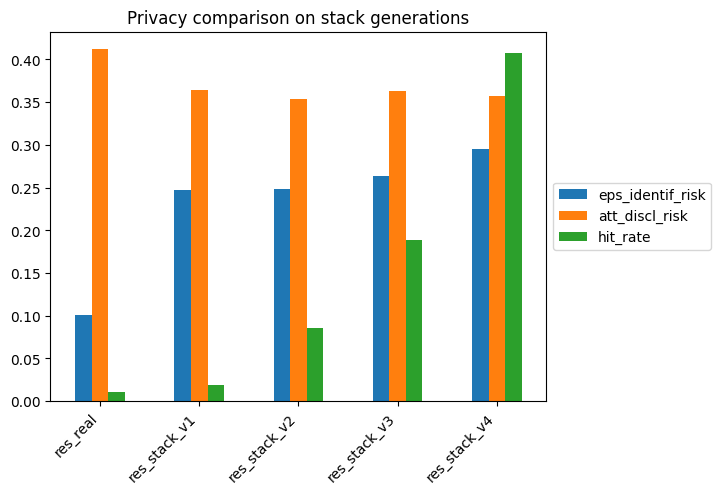

In [32]:
privacy_plot.plot.bar()
plt.title("Privacy comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [33]:
utility_plot = pd.DataFrame(columns=["avg_dwm_diff",
                                     "pca_eigval_diff",
                                     "pca_eigvec_ang"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    utility_plot.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"], 
                                    evals.loc["pca_eigval_diff", "val"],
                                    evals.loc["pca_eigvec_ang", "val"]]

utility_plot

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang
res_real,0.040234,0.253222,0.116909
res_stack_v1,0.020963,0.223385,0.063869
res_stack_v2,0.018365,0.181545,0.120500
res_stack_v3,0.007105,0.052230,0.078468
res_stack_v4,0.012604,0.096550,0.152034


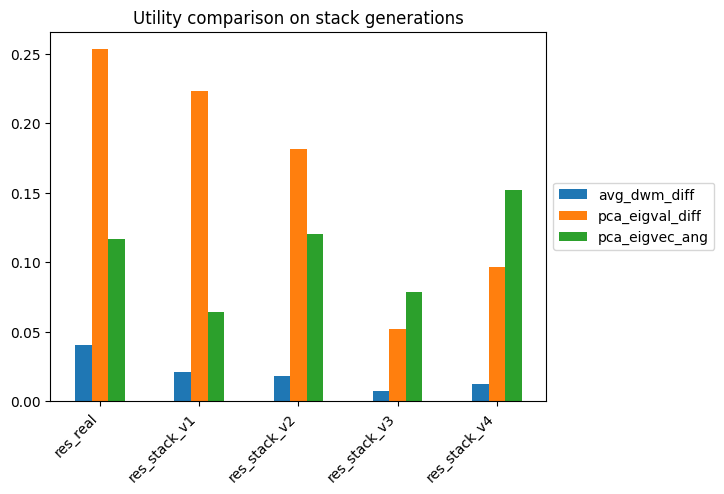

In [34]:
utility_plot.plot.bar()
plt.title("Utility comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [35]:
matrix_diff_plot = pd.DataFrame(columns=["corr_mat_diff",
                                     "mutual_inf_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    matrix_diff_plot.loc[eval_str[i]] = [evals.loc["corr_mat_diff", "val"], 
                                    evals.loc["mutual_inf_diff", "val"]]

matrix_diff_plot

,corr_mat_diff,mutual_inf_diff
res_real,2.154705,0.894862
res_stack_v1,1.397661,0.589765
res_stack_v2,0.970419,0.450662
res_stack_v3,0.247848,0.205102
res_stack_v4,0.390252,0.191820


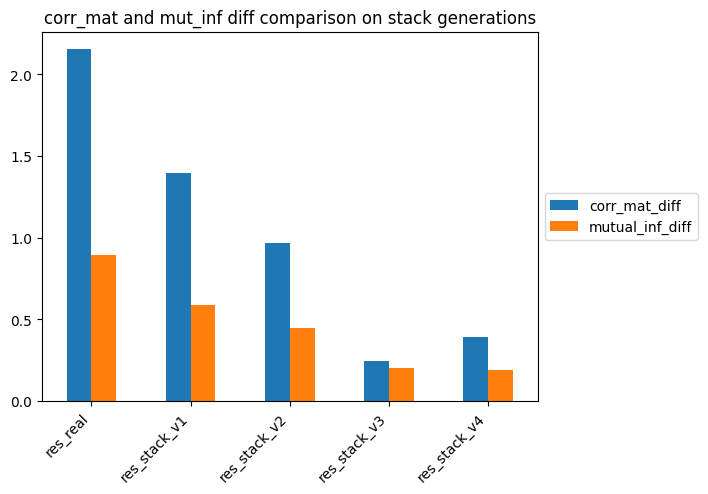

In [36]:
matrix_diff_plot.plot.bar()
plt.title("corr_mat and mut_inf diff comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [37]:
total_eval = pd.DataFrame(columns=["avg_dwm_diff",
                                   "pca_eigval_diff",
                                  "pca_eigvec_ang",
                                  "avg_cio",
                                  "corr_mat_diff",
                                  "mutual_inf_diff",
                                  "ks_tvd_stat",
                                  "frac_ks_sigs",
                                  "avg_h_dist",
                                  "avg_pMSE",
                                  "avg_nndr",
                                  "priv_loss_nndr",
                                  "nnaa",
                                  "priv_loss_nnaa",
                                  "cls_F1_diff",
                                  "cls_F1_diff_hout",
                                  #"median_DCR",
                                  "hit_rate",
                                  "eps_identif_risk",
                                  "mia_cls_risk",
                                  "att_discl_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    total_eval.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"],
                                   evals.loc["pca_eigval_diff", "val"],
                                   evals.loc["pca_eigvec_ang", "val"],
                                   evals.loc["avg_cio", "val"],
                                   evals.loc["corr_mat_diff", "val"],
                                   evals.loc["mutual_inf_diff", "val"],
                                   evals.loc["ks_tvd_stat", "val"],
                                   evals.loc["frac_ks_sigs", "val"],
                                   evals.loc["avg_h_dist", "val"],
                                   evals.loc["avg_pMSE", "val"],
                                   evals.loc["avg_nndr", "val"],
                                   evals.loc["priv_loss_nndr", "val"],
                                   evals.loc["nnaa", "val"],
                                   evals.loc["priv_loss_nnaa", "val"],
                                   evals.loc["cls_F1_diff", "val"],
                                   evals.loc["cls_F1_diff_hout", "val"],
                                   #evals.loc["median_DCR", "val"],
                                   evals.loc["hit_rate", "val"],
                                   evals.loc["eps_identif_risk", "val"],
                                   evals.loc["mia_cls_risk", "val"],
                                   evals.loc["att_discl_risk", "val"]]
total_eval

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang,avg_cio,corr_mat_diff,mutual_inf_diff,ks_tvd_stat,frac_ks_sigs,avg_h_dist,avg_pMSE,avg_nndr,priv_loss_nndr,nnaa,priv_loss_nnaa,cls_F1_diff,cls_F1_diff_hout,hit_rate,eps_identif_risk,mia_cls_risk,att_discl_risk
res_real,0.040234,0.253222,0.116909,0.000000,2.154705,0.894862,0.160380,0.857143,0.121616,0.009926,0.784308,0.036553,0.870097,-0.088505,0.169147,0.182836,0.011236,0.101124,0.752941,0.411891
res_stack_v1,0.020963,0.223385,0.063869,0.417348,1.397661,0.589765,0.105111,0.714286,0.108643,0.009075,0.813231,0.016600,0.803424,0.032646,0.140368,0.160448,0.018727,0.247191,0.877612,0.364414
res_stack_v2,0.018365,0.181545,0.120500,0.105270,0.970419,0.450662,0.095281,1.000000,0.107914,0.005196,0.811025,0.004621,0.801651,-0.036228,0.041661,0.046642,0.085206,0.248127,0.561194,0.353614
res_stack_v3,0.007105,0.052230,0.078468,0.307855,0.247848,0.205102,0.049364,0.714286,0.099507,0.001215,0.788178,0.004240,0.777095,0.007422,0.004916,0.021495,0.188582,0.262985,0.944776,0.362703
res_stack_v4,0.012604,0.096550,0.152034,0.209751,0.390252,0.191820,0.053770,0.571429,0.098447,0.002675,0.798527,0.014673,0.754531,0.055478,0.004737,0.016137,0.407719,0.294971,0.940935,0.357410


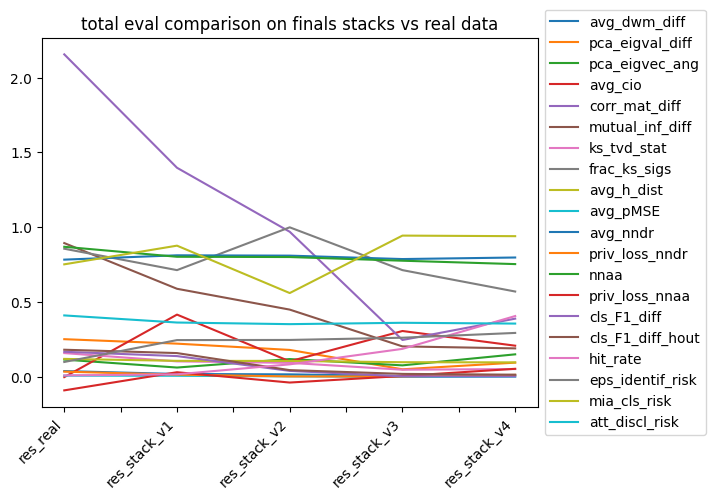

In [38]:
total_eval.plot.line()
plt.title("total eval comparison on finals stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# Evaluting final stacks compared to real data

In [39]:
eval_results = [res_real, res_stack_v5_on_real, res_stack_synth_only_on_real]
eval_str = ["res_real", "res_stack_v5_on_real", "res_stack_synth_only_on_real"]

In [40]:
privacy_plot = pd.DataFrame(columns=["eps_identif_risk",
                                     "att_discl_risk",
                                     "hit_rate"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    privacy_plot.loc[eval_str[i]] = [evals.loc["eps_identif_risk", "val"], 
                                    evals.loc["att_discl_risk", "val"],
                                    evals.loc["hit_rate", "val"]]

privacy_plot

,eps_identif_risk,att_discl_risk,hit_rate
res_real,0.101124,0.411891,0.011236
res_stack_v5_on_real,0.142322,0.404619,0.022472
res_stack_synth_only_on_real,0.071161,0.314799,0.003745


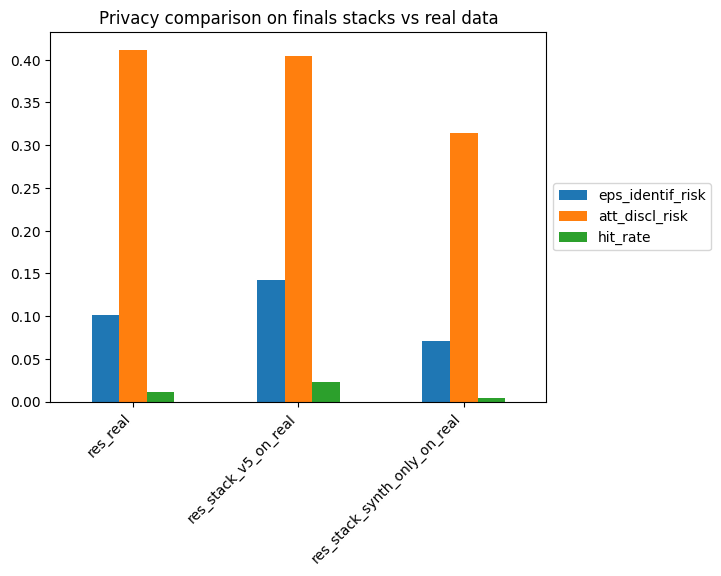

In [41]:
privacy_plot.plot.bar()
plt.title("Privacy comparison on finals stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [42]:
utility_plot = pd.DataFrame(columns=["avg_dwm_diff",
                                     "pca_eigval_diff",
                                     "pca_eigvec_ang"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    utility_plot.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"], 
                                    evals.loc["pca_eigval_diff", "val"],
                                    evals.loc["pca_eigvec_ang", "val"]]

utility_plot

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang
res_real,0.040234,0.253222,0.116909
res_stack_v5_on_real,0.039588,0.390747,0.225772
res_stack_synth_only_on_real,0.037070,0.440898,0.054831


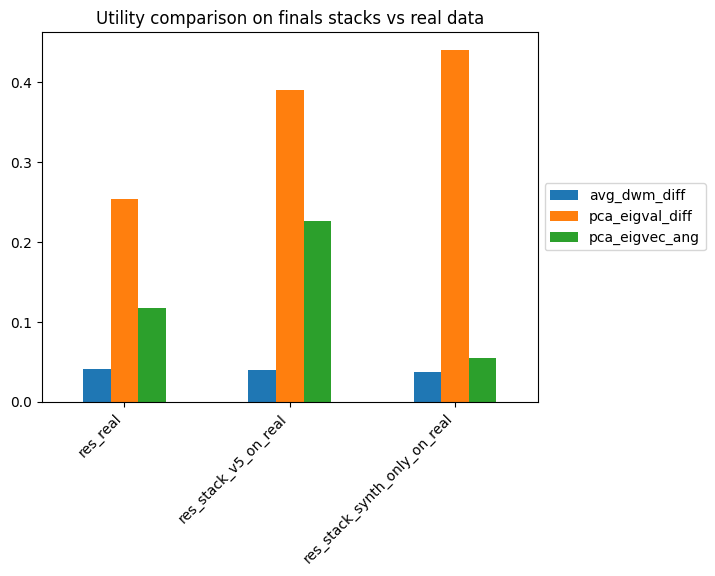

In [43]:
utility_plot.plot.bar()
plt.title("Utility comparison on finals stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [44]:
matrix_diff_plot = pd.DataFrame(columns=["corr_mat_diff",
                                     "mutual_inf_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    matrix_diff_plot.loc[eval_str[i]] = [evals.loc["corr_mat_diff", "val"], 
                                    evals.loc["mutual_inf_diff", "val"]]

matrix_diff_plot

,corr_mat_diff,mutual_inf_diff
res_real,2.154705,0.894862
res_stack_v5_on_real,2.669310,1.037136
res_stack_synth_only_on_real,2.777869,1.010559


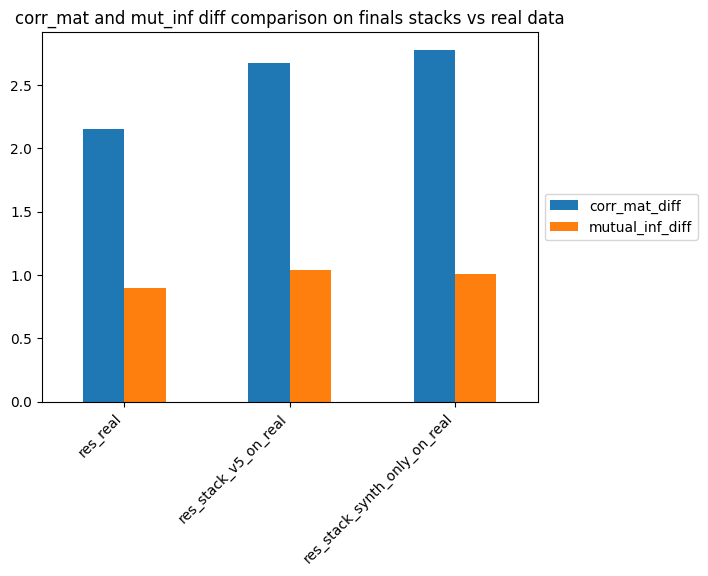

In [45]:
matrix_diff_plot.plot.bar()
plt.title("corr_mat and mut_inf diff comparison on finals stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [46]:
total_eval = pd.DataFrame(columns=["avg_dwm_diff",
                                   "pca_eigval_diff",
                                  "pca_eigvec_ang",
                                  "avg_cio",
                                  "corr_mat_diff",
                                  "mutual_inf_diff",
                                  "ks_tvd_stat",
                                  "frac_ks_sigs",
                                  "avg_h_dist",
                                  "avg_pMSE",
                                  "avg_nndr",
                                  "priv_loss_nndr",
                                  "nnaa",
                                  "priv_loss_nnaa",
                                  "cls_F1_diff",
                                  "cls_F1_diff_hout",
                                  #"median_DCR",
                                  "hit_rate",
                                  "eps_identif_risk",
                                  "mia_cls_risk",
                                  "att_discl_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    total_eval.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"],
                                   evals.loc["pca_eigval_diff", "val"],
                                   evals.loc["pca_eigvec_ang", "val"],
                                   evals.loc["avg_cio", "val"],
                                   evals.loc["corr_mat_diff", "val"],
                                   evals.loc["mutual_inf_diff", "val"],
                                   evals.loc["ks_tvd_stat", "val"],
                                   evals.loc["frac_ks_sigs", "val"],
                                   evals.loc["avg_h_dist", "val"],
                                   evals.loc["avg_pMSE", "val"],
                                   evals.loc["avg_nndr", "val"],
                                   evals.loc["priv_loss_nndr", "val"],
                                   evals.loc["nnaa", "val"],
                                   evals.loc["priv_loss_nnaa", "val"],
                                   evals.loc["cls_F1_diff", "val"],
                                   evals.loc["cls_F1_diff_hout", "val"],
                                   #evals.loc["median_DCR", "val"],
                                   evals.loc["hit_rate", "val"],
                                   evals.loc["eps_identif_risk", "val"],
                                   evals.loc["mia_cls_risk", "val"],
                                   evals.loc["att_discl_risk", "val"]]
total_eval

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang,avg_cio,corr_mat_diff,mutual_inf_diff,ks_tvd_stat,frac_ks_sigs,avg_h_dist,avg_pMSE,avg_nndr,priv_loss_nndr,nnaa,priv_loss_nnaa,cls_F1_diff,cls_F1_diff_hout,hit_rate,eps_identif_risk,mia_cls_risk,att_discl_risk
res_real,0.040234,0.253222,0.116909,0.000000,2.154705,0.894862,0.160380,0.857143,0.121616,0.009926,0.784308,0.036553,0.870097,-0.088505,0.169147,0.182836,0.011236,0.101124,0.752941,0.411891
res_stack_v5_on_real,0.039588,0.390747,0.225772,0.143585,2.669310,1.037136,0.195518,0.714286,0.128243,0.015854,0.831844,-0.004412,0.883929,-0.028207,0.230975,0.212687,0.022472,0.142322,0.641176,0.404619
res_stack_synth_only_on_real,0.037070,0.440898,0.054831,0.019298,2.777869,1.010559,0.196272,0.857143,0.118808,0.015016,0.807136,-0.025456,0.928491,-0.073267,0.322991,0.238806,0.003745,0.071161,0.441176,0.314799


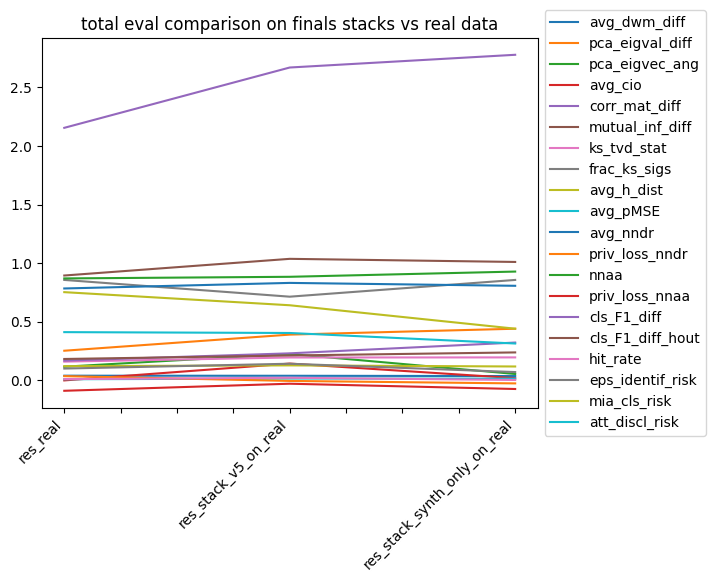

In [47]:
total_eval.plot.line()
plt.title("total eval comparison on finals stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()